<div style="position:relative">
<img src="https://www.trinetratsense.com/wp-content/uploads/2019/09/consulting-solution-banner.jpg" alt="Data Science Project on Time Series"/>
<h1 style="position:absolute; top:150px; left: 5px; font-size:30pt;">Data Science Project on Time Series</h1>
</div>

#### take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter_20240727.csv", index_col= 'Date', parse_dates=True)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


#### For convenience, we’ll shrink the column names and adding a “Total” column:

In [9]:
print(data.columns)

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')


In [11]:
data.columns = ["Total","West", "East"]
data.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [13]:

print(data)
data = data[1:]
print(data)
print(data.index)

                     Total   West   East
Date                                    
2012-10-02 13:00:00   55.0    7.0   48.0
2012-10-02 14:00:00  130.0   55.0   75.0
2012-10-02 15:00:00  152.0   81.0   71.0
2012-10-02 16:00:00  278.0  167.0  111.0
2012-10-02 17:00:00  563.0  393.0  170.0
...                    ...    ...    ...
2024-06-30 19:00:00  125.0   57.0   68.0
2024-06-30 20:00:00  121.0   37.0   84.0
2024-06-30 21:00:00   52.0   13.0   39.0
2024-06-30 22:00:00   32.0   10.0   22.0
2024-06-30 23:00:00   18.0    9.0    9.0

[102947 rows x 3 columns]
                     Total   West   East
Date                                    
2012-10-02 14:00:00  130.0   55.0   75.0
2012-10-02 15:00:00  152.0   81.0   71.0
2012-10-02 16:00:00  278.0  167.0  111.0
2012-10-02 17:00:00  563.0  393.0  170.0
2012-10-02 18:00:00  381.0  236.0  145.0
...                    ...    ...    ...
2024-06-30 19:00:00  125.0   57.0   68.0
2024-06-30 20:00:00  121.0   37.0   84.0
2024-06-30 21:00:00   52.0   1

In [15]:
data.dropna().describe()

,Total,West,East
count,102918.000000,102918.000000,102918.000000
mean,105.727171,45.540761,60.186411
std,131.829218,59.811249,81.792052
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,62.000000,79.000000
max,1097.000000,667.000000,850.000000


## Visualizing the data

### We can gain some insight into the dataset by visualizing it. Let’s start by plotting the raw data:

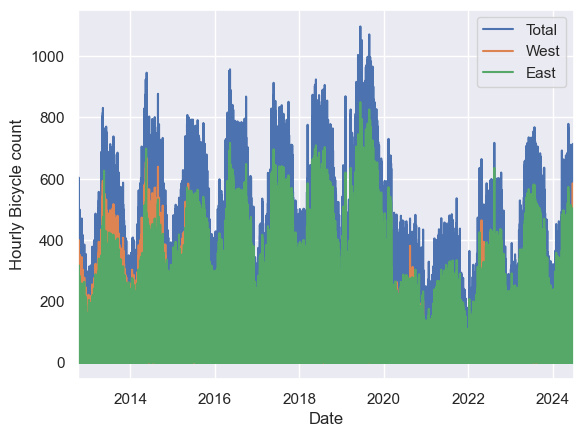

In [18]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid.

### resample by week:

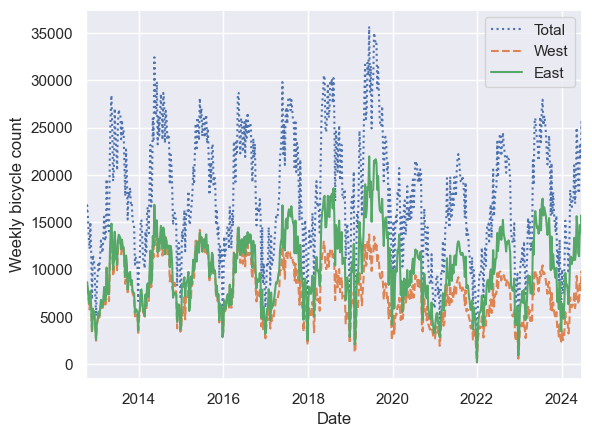

In [22]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

## 30-day rolling mean of our data

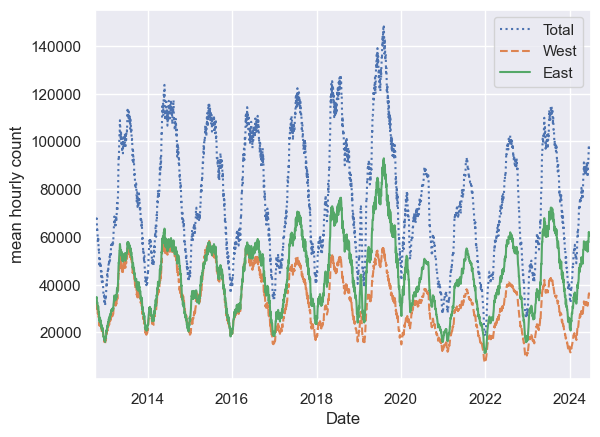

In [25]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

## Digging into the data

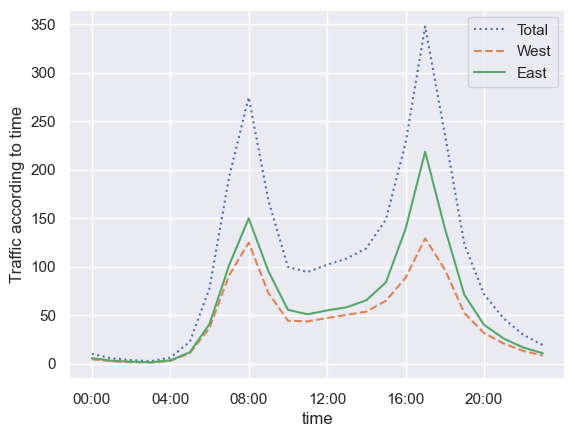

In [28]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()

In [30]:
data.isnull().sum()

Total    28
West     28
East     28
dtype: int64

# Regression Test

In [33]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [35]:
data.dropna(inplace=True)

In [37]:
x,y= data[["West","East"]],data[["Total"]]

In [ ]:
df = algo_test(x,y)

In [25]:
df.head()

,R_Squared,RMSE,MAE
Linear,1.0,1.171791e-13,7.631838e-14
Ridge,1.0,2.010990e-07,1.373954e-07
Lasso,1.0,1.484203e-02,1.043127e-02
ElasticNet,1.0,1.484520e-02,1.043295e-02
mlp_regressor,1.0,1.671375e-02,8.627557e-03


# Deep Learning


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model=Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer="adam")


In [82]:
from sklearn.preprocessing import normalize, scale # z-score
x=scale(x)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [86]:
import os
# Function to play a beep sound
def beep():
    os.system('echo -e "\a"')  # This sends a beep character to the terminal

In [88]:
#model.fit(x_train,y_train,epochs=250, batch_size=32, validation_split=.20,verbose=1)
model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=32, epochs=250)
beep()

Epoch 1/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - loss: 17539.9629 - val_loss: 17437.7109
Epoch 2/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - loss: 17408.3809 - val_loss: 17437.7227
Epoch 3/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - loss: 16937.4180 - val_loss: 17437.7148
Epoch 4/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - loss: 17563.9648 - val_loss: 17437.7109
Epoch 5/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - loss: 17139.5742 - val_loss: 17437.7188
Epoch 6/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - loss: 17207.9258 - val_loss: 17437.7148
Epoch 7/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - loss: 17458.9238 - val_loss: 17437.7207
Epoch 8/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - loss: 17584.7305 - val_loss: 17437.7109
Epoch 9/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - loss: 17451.5664 - val_loss: 17437.7129
Epoch 10/250
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - loss: 17615.7441 - val_loss: 17437.7031
Epoch 11/

In [89]:
tahmin=model.predict(x_test)

644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


In [92]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,tahmin)

-2.0559713799661594e-05

In [94]:
mean_squared_error(y_test,tahmin)**.5

132.0518841592772